In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read data
file_path = Path("moviesinfos.csv")
df = pd.read_csv(file_path)

# Display sample data
display(df.head(10))
display(df.tail(10))

,title,startYear,primaryName,category,genres,runtimeMinutes,averageRating,numVotes,titleId
0,The Gay Divorcee,1934,Fred Astaire,actor,"Comedy,Musical,Romance",107,7.4,8365,tt0025164
1,Roberta,1935,Fred Astaire,actor,"Comedy,Musical,Romance",106,7.0,3577,tt0026942
2,The World by the Tail,1935,Fred Astaire,actor,"Comedy,Musical,Romance",101,7.7,20167,tt0027125
3,Follow the Fleet,1936,Fred Astaire,actor,"Comedy,Musical,Romance",110,7.1,4608,tt0027630
4,I Won't Dance,1936,Fred Astaire,actor,"Comedy,Musical,Romance",103,7.5,14309,tt0028333
5,Shall We Dance,1937,Fred Astaire,actor,"Comedy,Musical,Romance",109,7.5,7691,tt0029546
6,Carefree,1938,Fred Astaire,actor,"Comedy,Musical,Romance",83,7.0,4175,tt0029971
7,The Life of Vernon and Irene Castle,1939,Fred Astaire,actor,"Biography,Drama,Music",93,6.9,2728,tt0031983
8,Broadway Melody of 1940,1940,Fred Astaire,actor,Musical,102,7.3,2626,tt0032284
9,Second Chorus,1940,Fred Astaire,actor,"Comedy,Musical,Romance",84,5.7,1680,tt0033029


,title,startYear,primaryName,category,genres,runtimeMinutes,averageRating,numVotes,titleId
135756,Turkey Town,2018,Pippa Seymour,director,Animation,73,3.6,26,tt8535848
135757,A Frozen Christmas 3,2018,Pippa Seymour,director,"Animation,Musical",70,3.7,49,tt8535852
135758,Lockdown: Uma Hist�ria de Desinforma��o e Poder,2021,Ian Maldonado,director,Documentary,112,8.7,11,tt14623018
135759,The Redneck Against the Devil,2018,Andrew Olejnik,actor,Horror,54,4.1,8,tt8617496
135760,Zombie Massacre,2015,Dai Jinyuan,actor,Horror,67,6.2,8,tt8619980
135761,Song of Songs: The Journey of a Consecrated Vi...,2020,Denise Ferrari,director,Documentary,45,9.7,9,tt8628638
135762,Mt. Misery Rd.,2018,Chuck Morrongiello,actor,"Horror,Mystery,Thriller",75,1.6,1846,tt8634348
135763,The Fear Footage 2: Curse of the Tape,2020,Ricky Umberger,director,Horror,74,5.3,242,tt11323964
135764,The Fear Footage,2018,Ricky Umberger,director,Horror,71,4.9,928,tt8675532
135765,White Spot,2020,Ariane Figueiredo,writer,"Adventure,Documentary,Drama",92,4.4,21,tt8742566


In [5]:
df.isnull().sum()

title             0
startYear         0
primaryName       0
category          0
genres            0
runtimeMinutes    0
averageRating     0
numVotes          0
titleId           0
dtype: int64

In [6]:
# split the genres into a list
df['genres'] = df['genres'].str.split(',')


In [7]:
# explode the list to new rows
df_exploded = df.explode('genres')


In [8]:
# create the dummy variables
genre_dummies = pd.get_dummies(df_exploded['genres'], prefix='genre')


In [9]:
# Merge the dummy variables back to original data
genre_dummies = genre_dummies.groupby(level=0).sum()
df = df.drop(columns=['genres'])
df = pd.concat([df, genre_dummies], axis=1)

In [10]:
display(df.head(10))
display(df.tail(10))

,title,startYear,primaryName,category,runtimeMinutes,averageRating,numVotes,titleId,genre_Action,genre_Adult,...,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
0,The Gay Divorcee,1934,Fred Astaire,actor,107,7.4,8365,tt0025164,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Roberta,1935,Fred Astaire,actor,106,7.0,3577,tt0026942,0,0,...,0,0,0,1,0,0,0,0,0,0
2,The World by the Tail,1935,Fred Astaire,actor,101,7.7,20167,tt0027125,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Follow the Fleet,1936,Fred Astaire,actor,110,7.1,4608,tt0027630,0,0,...,0,0,0,1,0,0,0,0,0,0
4,I Won't Dance,1936,Fred Astaire,actor,103,7.5,14309,tt0028333,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Shall We Dance,1937,Fred Astaire,actor,109,7.5,7691,tt0029546,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Carefree,1938,Fred Astaire,actor,83,7.0,4175,tt0029971,0,0,...,0,0,0,1,0,0,0,0,0,0
7,The Life of Vernon and Irene Castle,1939,Fred Astaire,actor,93,6.9,2728,tt0031983,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Broadway Melody of 1940,1940,Fred Astaire,actor,102,7.3,2626,tt0032284,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Second Chorus,1940,Fred Astaire,actor,84,5.7,1680,tt0033029,0,0,...,0,0,0,1,0,0,0,0,0,0


,title,startYear,primaryName,category,runtimeMinutes,averageRating,numVotes,titleId,genre_Action,genre_Adult,...,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
135756,Turkey Town,2018,Pippa Seymour,director,73,3.6,26,tt8535848,0,0,...,0,0,0,0,0,0,0,0,0,0
135757,A Frozen Christmas 3,2018,Pippa Seymour,director,70,3.7,49,tt8535852,0,0,...,0,0,0,0,0,0,0,0,0,0
135758,Lockdown: Uma Hist�ria de Desinforma��o e Poder,2021,Ian Maldonado,director,112,8.7,11,tt14623018,0,0,...,0,0,0,0,0,0,0,0,0,0
135759,The Redneck Against the Devil,2018,Andrew Olejnik,actor,54,4.1,8,tt8617496,0,0,...,0,0,0,0,0,0,0,0,0,0
135760,Zombie Massacre,2015,Dai Jinyuan,actor,67,6.2,8,tt8619980,0,0,...,0,0,0,0,0,0,0,0,0,0
135761,Song of Songs: The Journey of a Consecrated Vi...,2020,Denise Ferrari,director,45,9.7,9,tt8628638,0,0,...,0,0,0,0,0,0,0,0,0,0
135762,Mt. Misery Rd.,2018,Chuck Morrongiello,actor,75,1.6,1846,tt8634348,0,0,...,1,0,0,0,0,0,0,1,0,0
135763,The Fear Footage 2: Curse of the Tape,2020,Ricky Umberger,director,74,5.3,242,tt11323964,0,0,...,0,0,0,0,0,0,0,0,0,0
135764,The Fear Footage,2018,Ricky Umberger,director,71,4.9,928,tt8675532,0,0,...,0,0,0,0,0,0,0,0,0,0
135765,White Spot,2020,Ariane Figueiredo,writer,92,4.4,21,tt8742566,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# convert the category into numeric
category_dummies = pd.get_dummies(df['category'], prefix='category')
df = pd.concat([df, category_dummies], axis=1)
df = df.drop(columns=['category'])


In [12]:
df.head(10)

,title,startYear,primaryName,runtimeMinutes,averageRating,numVotes,titleId,genre_Action,genre_Adult,genre_Adventure,...,category_archive_footage,category_archive_sound,category_cinematographer,category_composer,category_director,category_editor,category_producer,category_production_designer,category_self,category_writer
0,The Gay Divorcee,1934,Fred Astaire,107,7.4,8365,tt0025164,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roberta,1935,Fred Astaire,106,7.0,3577,tt0026942,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The World by the Tail,1935,Fred Astaire,101,7.7,20167,tt0027125,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Follow the Fleet,1936,Fred Astaire,110,7.1,4608,tt0027630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I Won't Dance,1936,Fred Astaire,103,7.5,14309,tt0028333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Shall We Dance,1937,Fred Astaire,109,7.5,7691,tt0029546,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Carefree,1938,Fred Astaire,83,7.0,4175,tt0029971,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,The Life of Vernon and Irene Castle,1939,Fred Astaire,93,6.9,2728,tt0031983,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Broadway Melody of 1940,1940,Fred Astaire,102,7.3,2626,tt0032284,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Second Chorus,1940,Fred Astaire,84,5.7,1680,tt0033029,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(df.columns.tolist())

['title', 'startYear', 'primaryName', 'runtimeMinutes', 'averageRating', 'numVotes', 'titleId', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Film-Noir', 'genre_History', 'genre_Horror', 'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_News', 'genre_Reality-TV', 'genre_Romance', 'genre_Sci-Fi', 'genre_Sport', 'genre_Talk-Show', 'genre_Thriller', 'genre_War', 'genre_Western', 'category_actor', 'category_actress', 'category_archive_footage', 'category_archive_sound', 'category_cinematographer', 'category_composer', 'category_director', 'category_editor', 'category_producer', 'category_production_designer', 'category_self', 'category_writer']


In [15]:
# List of genre columns
genre_columns = list(genre_dummies.columns)

In [16]:
# List of specific category columns
specific_category_columns = ['category_actor', 'category_actress', 'category_director', 'category_producer', 'category_writer']


In [17]:
# Adding 'runtimeMinutes'
feature_columns = ['runtimeMinutes'] + genre_columns + specific_category_columns


In [19]:
# Create the feature DataFrame
X = df[feature_columns]

# Target variable
y = df['averageRating']

In [22]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# train the model
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3933796608958173
R-squared: 0.23868642499727444


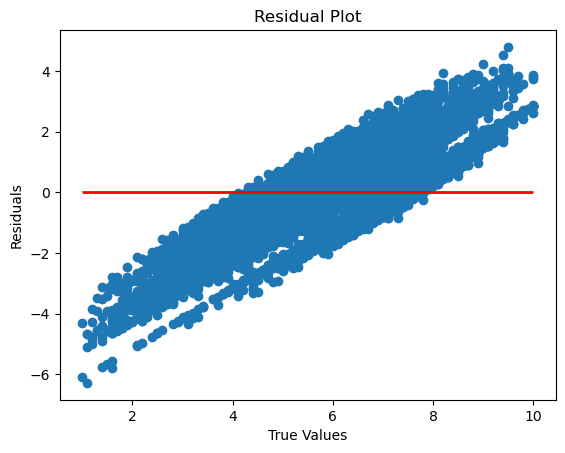

In [26]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create residual plot
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


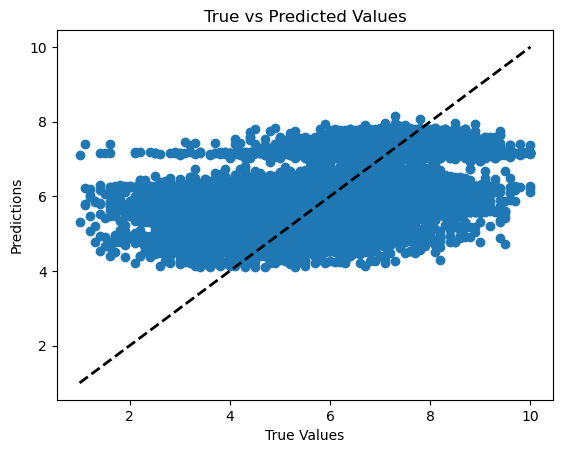

In [27]:
# Create prediction vs actual plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

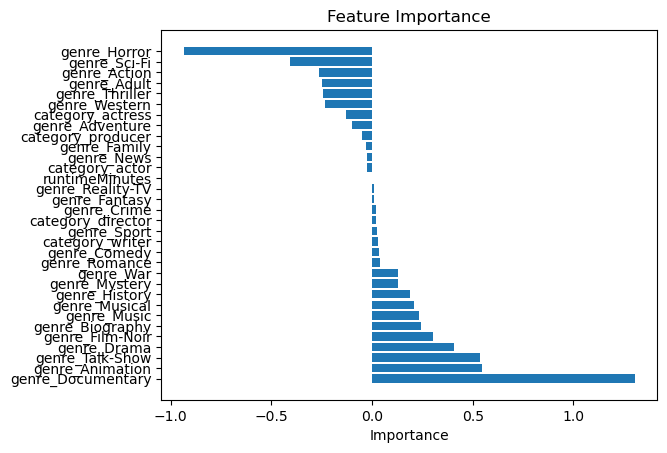

In [28]:
# feature importance
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
importance = importance.sort_values('Importance', ascending=False)
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()